# Sport Analytics - Prediction Modeling

In [8]:
#import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.metrics import r2_score

In [3]:
#import required data
df = pd.read_csv("C:/Users/cscott/Desktop/OR603/Sports_Analytics/data/complete_combine_data.csv")
#df = pd.read_csv("/Users/deepak/Documents/DAEN/Sports Analytics/Project/data/complete_combine_data.csv")

In [4]:
# checking the data in the data frame
print(df.isna().sum())
df.sample(10)

player_name_pfr    0
college_combine    0
Ht                 0
Wt                 0
X40yd              0
Vertical           0
Bench              0
Broad_Jump         0
X3Cone             0
Shuttle            0
pos_combine        0
combine_yr         0
Pick               0
Career_AV_New      0
draft_dummy        0
dtype: int64


,player_name_pfr,college_combine,Ht,Wt,X40yd,Vertical,Bench,Broad_Jump,X3Cone,Shuttle,pos_combine,combine_yr,Pick,Career_AV_New,draft_dummy
1385,Chris Pantale,Boston Col.,77,254,4.99,33.5,17,110,7.48,4.50,TE,2013,300,0,0
1545,Chris Borland,Wisconsin,71,248,4.83,31.0,27,114,7.18,4.27,ILB,2014,77,7,1
63,Marcell Allmond,USC,72,209,4.59,38.0,21,123,7.37,4.34,CB,2004,300,0,0
1444,Lanear Sampson,Baylor,71,204,4.46,33.5,20,119,7.10,4.38,WR,2013,300,0,0
429,C.J. Gaddis,Clemson,71,203,4.45,36.5,20,121,7.28,4.30,S,2007,159,0,1
1342,Shea McClellin,Boise State,75,260,4.62,31.5,19,118,7.07,4.33,OLB,2012,19,18,1
259,Antoine Bethea,Howard,71,203,4.39,36.5,19,127,6.99,4.11,S,2006,207,64,1
1731,Jahwan Edwards,Ball State,69,220,4.80,35.5,16,117,7.63,4.50,RB,2015,300,0,0
620,Jamey Richard,Buffalo,77,295,5.22,26.5,22,107,7.58,4.69,C,2008,236,11,1
415,Antonio Johnson,Mississippi State,75,310,5.15,29.0,28,108,7.47,4.49,DT,2007,152,22,1


In [16]:
# create clean_df data frame because it is called below
clean_df = df

# Creating Models to Predict the Response Variable - 
### 1) Pick - Overall number of pick
### 2) Career_AV_New - Career total Approximate Value of player*
### 3) draft_dummy - Binary Variable

# Section 1 : ML Models

### Model 1 - Random Forest Regressor to Predict "Pick"

In [5]:
# Splitting the data for Train and Test - 80% train, 20% test
X = df.iloc[:, [2,3,4,5,6,7,8,9,11]].values
y = df.iloc[:, 12].values
X

array([[  78.  ,  323.  ,    5.49, ...,    7.95,    4.91, 2004.  ],
       [  77.  ,  265.  ,    4.9 , ...,    7.46,    4.28, 2004.  ],
       [  75.  ,  317.  ,    5.54, ...,    8.12,    4.55, 2004.  ],
       ...,
       [  77.  ,  320.  ,    4.85, ...,    7.65,    4.68, 2020.  ],
       [  73.  ,  243.  ,    4.46, ...,    7.08,    4.3 , 2020.  ],
       [  74.  ,  238.  ,    4.65, ...,    7.  ,    4.31, 2020.  ]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [10]:
#score = regressor.score(X_train, y_train)
#print("R-squared:", score)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-squared: 0.14488231642199823
Mean Absolute Error: 81.21085714285714
Mean Squared Error: 9025.662616391837
Root Mean Squared Error: 95.00348739068392


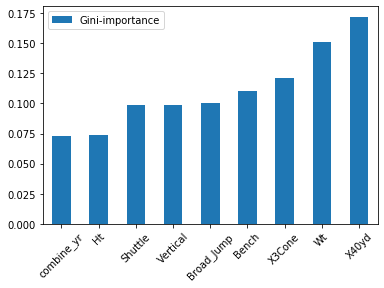

In [12]:
feats = {}
for feature, importance in zip(df.iloc[:, [2,3,4,5,6,7,8,9,11]].columns, regressor.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

## X40yd followed by Wt and X3Cone are the most important variables in predicting Pick

##  Model 2 - Random Forest Regressor to Predict "Career_AV_New"

R-squared: 0.08965010338251289
Mean Absolute Error: 12.864542857142858
Mean Squared Error: 302.77048533061225
Root Mean Squared Error: 17.40030129999513


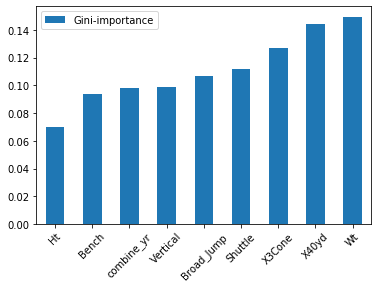

In [15]:
# Splitting the data for Train and Test - 80% train, 20% test
X = df.iloc[:, [2,3,4,5,6,7,8,9,11]].values
y = df.iloc[:, 13].values
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# score = regressor.score(X_train, y_train)
# print("R-squared:", score)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

feats = {}
for feature, importance in zip(df.iloc[:, [2,3,4,5,6,7,8,9,11]].columns, regressor.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

## Wt, followed by X40yd and X3Cone are the most important variables in predicting Pick

##  Model 3 - Random Forest Regressor to Predict "draft_dummy"

In [17]:
# Splitting the data for Train and Test - 80% train, 20% test
X = clean_df.iloc[:, [2,3,4,5,6,7,8,9,11]].values
y = clean_df.iloc[:, 14].values
X

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
rf_predictions = model.predict(X_test) 
# Probabilities for each class
rf_probs = model.predict_proba(X_test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print("roc_value", roc_value)

roc_value 0.6811152431465789


[[ 40 101]
 [ 46 303]]


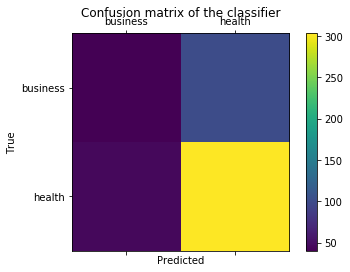

In [18]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, rf_predictions)
print(conf_mat)

labels = ['business', 'health']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Section 2: Clustering

In [19]:
X = np.array(clean_df[['Ht','Wt','X40yd','Vertical','Bench','Broad_Jump','X3Cone','Shuttle']])
Y = np.array(clean_df['pos_combine'])
scaler = StandardScaler()
#fitting scaler to the feature
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
#Use the .transform() method to transform the features into a scaled version.
scaled_features = scaler.transform(X)

In [21]:
#Converting the scaled features to a dataframe and check the dataframe to make sure the scaling worked.
df_feat = pd.DataFrame(scaled_features) 
df_feat

,0,1,2,3,4,5,6,7
0,1.488960,1.583091,2.212983,-0.846798,0.774667,-1.686844,1.627399,1.890918
1,1.116948,0.312148,0.340787,-0.497083,-0.793493,-0.736539,0.442986,-0.478981
2,0.372923,1.451614,2.371644,-1.429656,0.931483,-1.370075,2.038317,0.536690
3,0.000911,-0.827318,-0.801570,0.668633,-0.479861,0.636123,-0.717254,-1.080860
4,0.744936,0.991445,0.562912,-0.380512,0.931483,0.002587,1.288995,0.649542
...,...,...,...,...,...,...,...,...
2444,0.744936,1.254399,0.785037,-1.662800,-0.636677,-1.370075,1.071450,1.401891
2445,-2.231161,-0.914969,-0.738106,-0.613655,1.245116,0.002587,0.297956,0.461455
2446,1.116948,1.517353,0.182126,0.901776,0.461035,0.741713,0.902248,1.025717
2447,-0.371101,-0.169934,-1.055427,1.601206,-0.009413,2.325554,-0.475538,-0.403746


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, Y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(1836, 8)
(613, 8)


In [20]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [21]:
# making prediction
y_pred = knn.predict(X_test)

In [22]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.4632952691680261
